In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from collections import Counter
import matplotlib.pyplot as plt

#set random seed
random.seed(42)

In [3]:
#load dataset
df = pd.read_csv('diabetes.csv')

Start Exploratory analysis

In [5]:
#head of the dataset
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35       79  33.6   
1            1       85             66             29       79  26.6   
2            8      183             64             20       79  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [7]:
y = df['Outcome']
X = df.drop(columns=['Outcome'], errors='ignore')  

<Axes: >

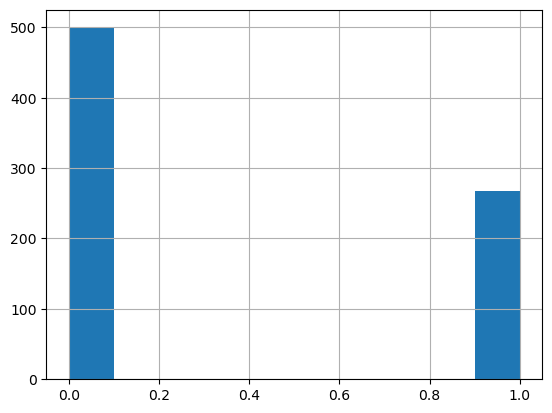

In [12]:
y.hist()

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

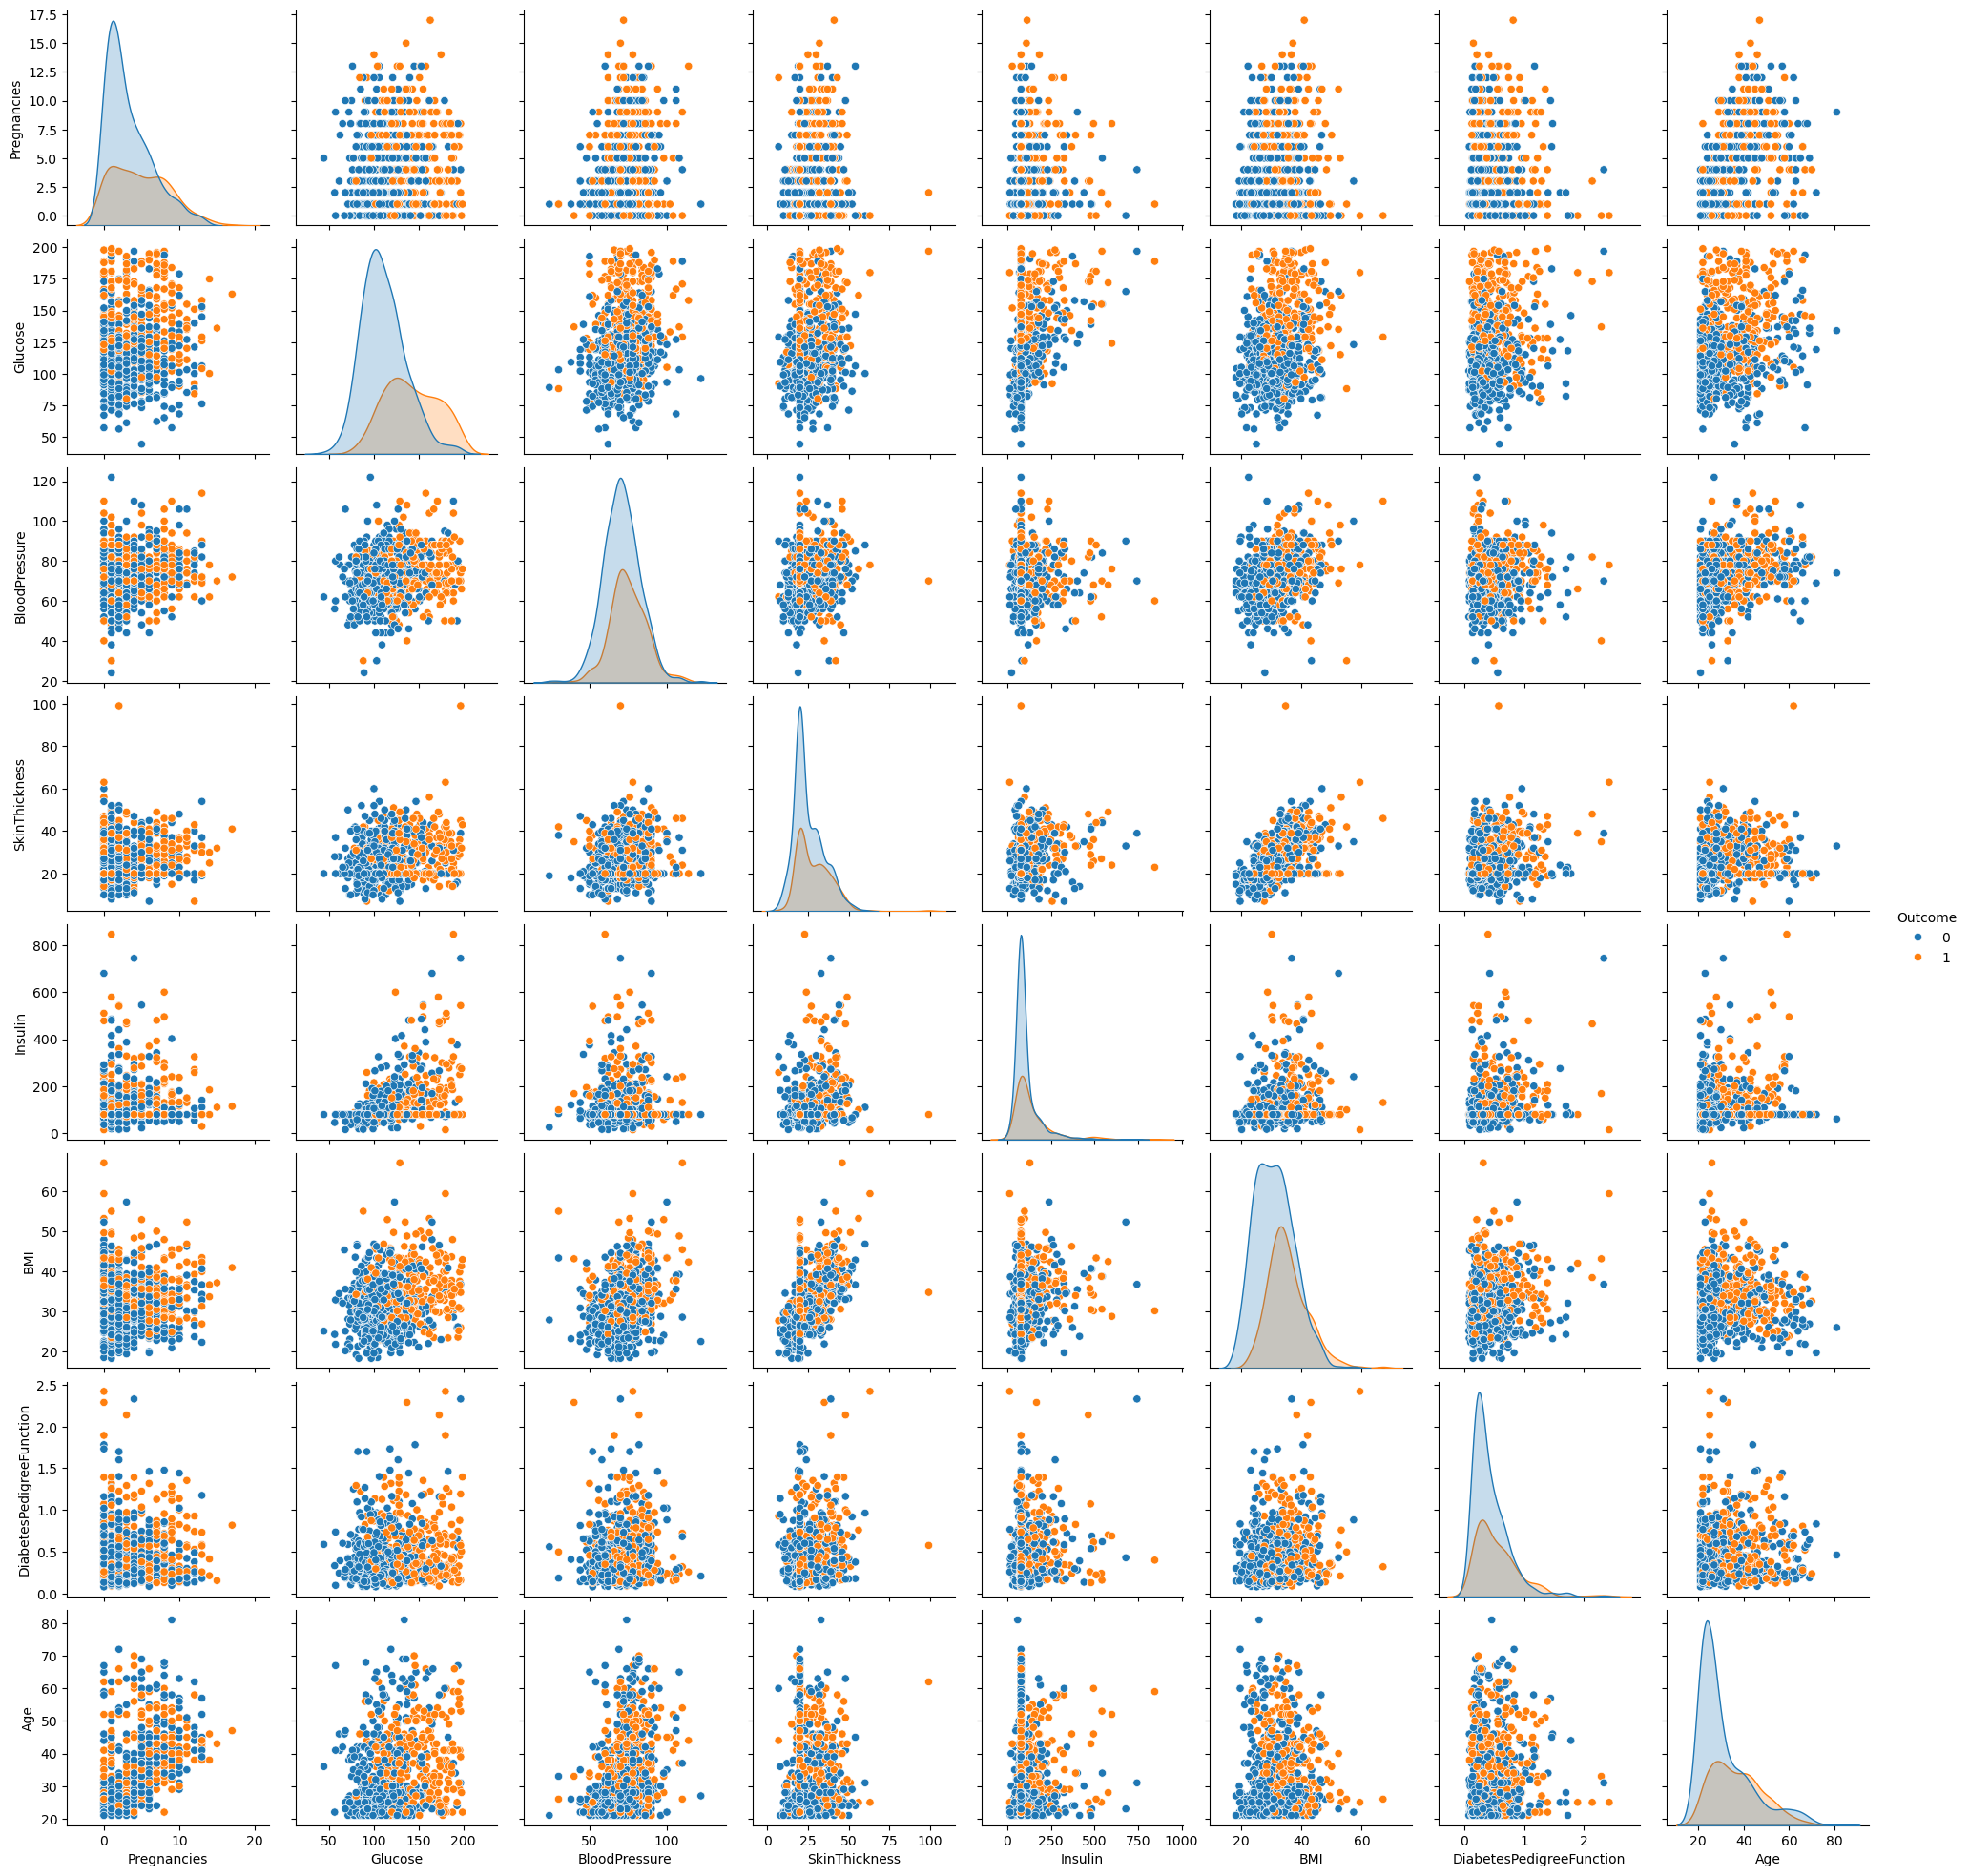

In [14]:
#make pairplot
sns.pairplot(df, hue='Outcome')
plt.show()

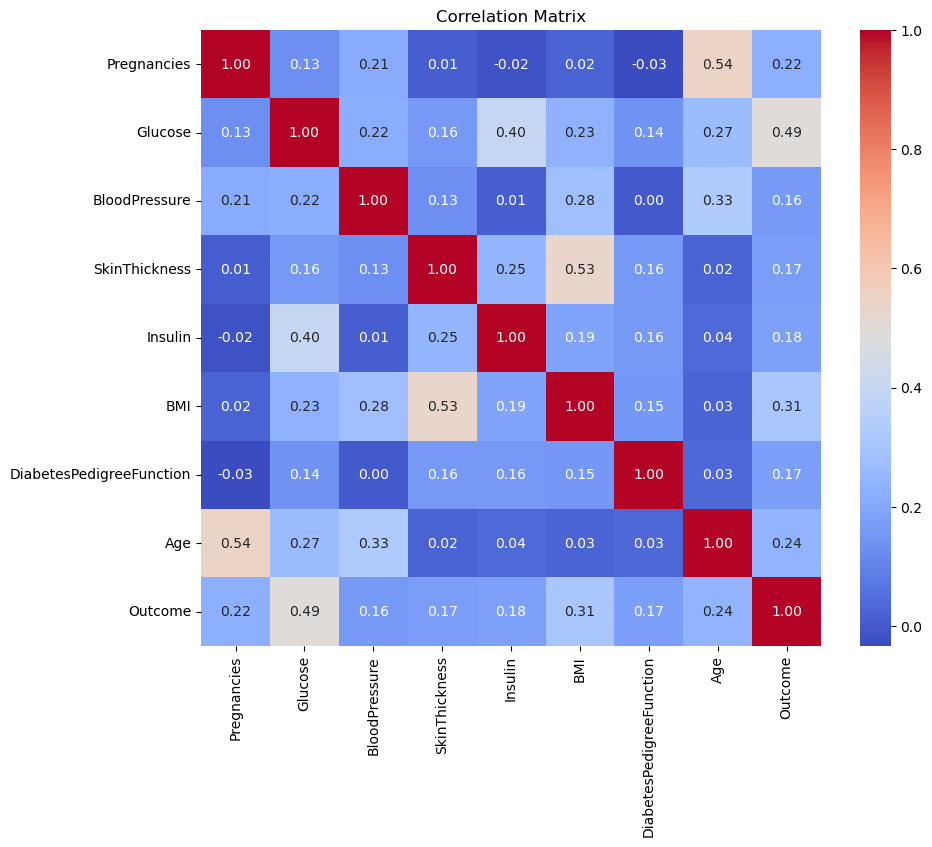

In [15]:
#make correlation matrix
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Run a knn model

Scikit-learn k-NN Accuracy: 0.62
Confusion Matrix:
 [[51 15]
 [23 11]]


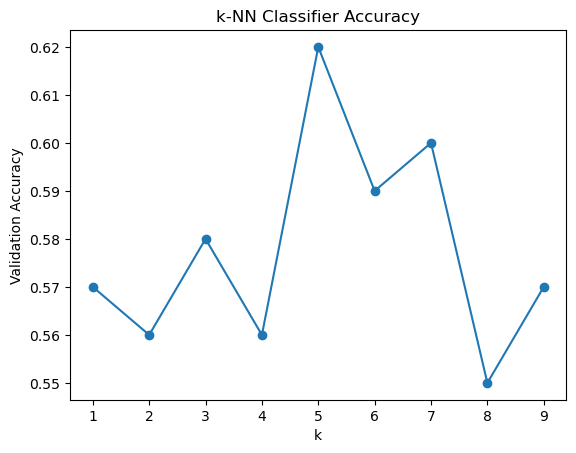

In [16]:
import random

# Set the seed to a specific value (e.g., 42)
random.seed(42)

#new with knn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) 
#To make the validation set 20% of the original data we use test size 0.25 as 0.25*0.8=0.2

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

#since knn big and omp expensive split to smaller
X_val_subset = random.sample(list(X_val), 100)
y_val_subset = random.sample(list(y_val), 100)

from sklearn import neighbors

#run knn
knn = neighbors.KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred_sklearn_knn = knn.predict(X_val_subset)
sklearn_accuracy = np.mean(y_pred_sklearn_knn == y_val_subset)
print(f'Scikit-learn k-NN Accuracy: {sklearn_accuracy:.2f}')
con_mat = confusion_matrix(y_val_subset, y_pred_sklearn_knn)
print('Confusion Matrix:\n', con_mat)

#plot knn
k_values = range(1, 10)
accuracies = []
for k in k_values:
    knn_model = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_val_subset)
    accuracy = np.mean(y_pred_knn == y_val_subset)
    accuracies.append(accuracy)
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('k-NN Classifier Accuracy')
plt.show()

Run a logistic regression model

In [17]:
#New logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_sklearn = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_sklearn)
print(f'Logistic Regression Accuracy (Sklearn): {accuracy:.2f}')
confusion_matrix(y_val, y_pred_sklearn)

Logistic Regression Accuracy (Sklearn): 0.79


array([[94,  7],
       [26, 27]])

Run an LDA model

In [19]:
y_LDA = df['Outcome']
X_LDA = df.drop(columns=['Outcome'], errors='ignore')  



#Now we split the data into training and testing sets
X_train_LDA, X_test_LDA, y_train_LDA, y_test_LDA = train_test_split(X_LDA, y_LDA, test_size=0.2, random_state=42)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Implement LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_LDA, y_train_LDA)

# Predictions
y_train_pred = lda.predict(X_train_LDA)
y_test_pred = lda.predict(X_test_LDA)

# Accuracy
train_accuracy = accuracy_score(y_train_LDA, y_train_pred)
test_accuracy = accuracy_score(y_test_LDA, y_test_pred)
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

Train accuracy: 0.7719869706840391
Test accuracy: 0.7662337662337663


Run a decision tree and random forest classifier models including cross validation

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor

In [26]:
y_dt = df['Outcome']
X_dt = df.drop(columns=['Outcome'], errors='ignore')  

# Now we split the data into training and testing sets
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_dt, y_train_dt)
y_pred_dt = dt_classifier.predict(X_test_dt)
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
print(f'Decision Tree Classifier Accuracy: {accuracy_dt:.2f}')
confusion_matrix_dt = confusion_matrix(y_test_dt, y_pred_dt)
print('Confusion Matrix:\n', confusion_matrix_dt)
print(classification_report(y_test_dt, y_pred_dt))


Decision Tree Classifier Accuracy: 0.76
Confusion Matrix:
 [[75 24]
 [13 42]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.80        99
           1       0.64      0.76      0.69        55

    accuracy                           0.76       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.78      0.76      0.76       154



Random Forest Classifier Accuracy: 0.76
Confusion Matrix:
 [[80 19]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



([<matplotlib.axis.XTick at 0x3106ed710>,
 [Text(0, 0, 'Glucose'),
  Text(1, 0, 'BMI'),
  Text(2, 0, 'Age'),
  Text(3, 0, 'DiabetesPedigreeFunction'),
  Text(4, 0, 'BloodPressure'),
  Text(5, 0, 'Insulin'),
  Text(6, 0, 'Pregnancies'),
  Text(7, 0, 'SkinThickness')])

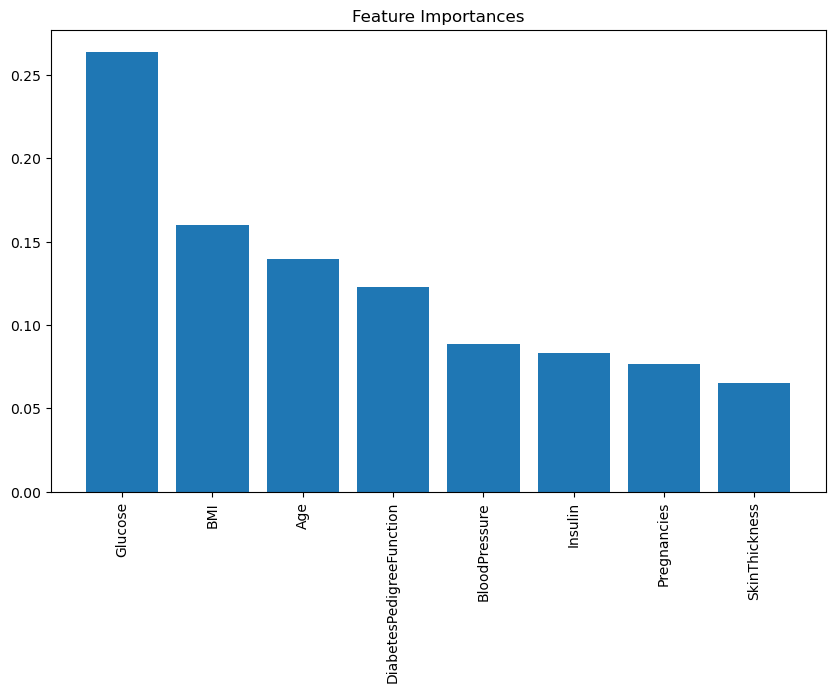

In [27]:
y_rf = df['Outcome']
X_rf = df.drop(columns=['Outcome'], errors='ignore')  

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

#create a preprocessor for scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_rf.columns)
    ],
    remainder='passthrough'
)
# Fit the preprocessor to the training data
X_train_rf = preprocessor.fit_transform(X_train_rf)
X_test_rf = preprocessor.transform(X_test_rf)
# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model
rf_model.fit(X_train_rf, y_train_rf)
# Make predictions
y_pred_rf = rf_model.predict(X_test_rf)
# Calculate accuracy
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
print(f'Random Forest Classifier Accuracy: {accuracy_rf:.2f}')
# Display the confusion matrix
confusion_rf = confusion_matrix(y_test_rf, y_pred_rf)
print('Confusion Matrix:\n', confusion_rf)
# Display the classification report
report_rf = classification_report(y_test_rf, y_pred_rf)
print('Classification Report:\n', report_rf)
# Plot feature importances
importances = rf_model.feature_importances_
feature_names = X_rf.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_rf.shape[1]), importances[indices], align="center")
plt.xticks(range(X_rf.shape[1]), feature_names[indices], rotation=90)



Cross-validation scores: [0.72727273 0.77922078 0.75324675 0.67532468 0.72727273 0.80519481
 0.80519481 0.83116883 0.69736842 0.77631579]
Mean cross-validation score: 0.7577580314422421


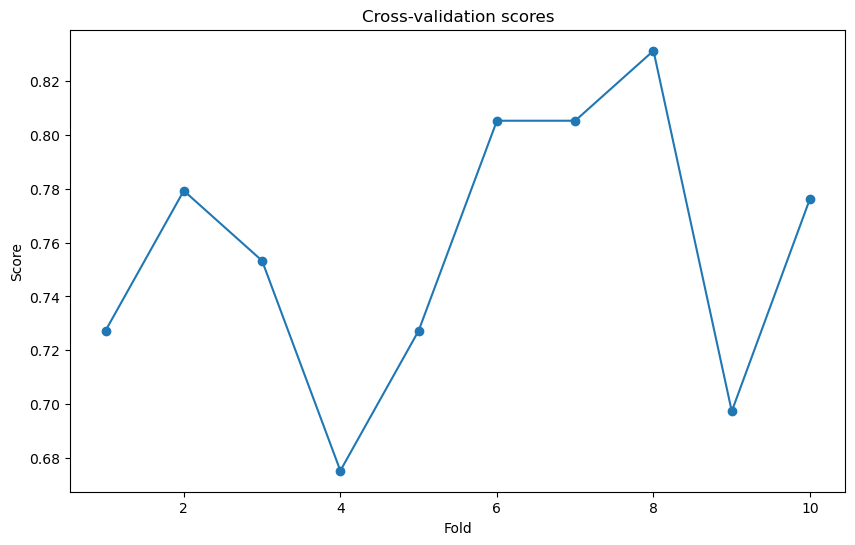

In [28]:
#do a 10 fold  cross validation on the random forest model
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model, X_rf, y_rf, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))
#plot the cross validation scores
plt.figure(figsize=(10, 6))
plt.title("Cross-validation scores")
plt.plot(range(1, 11), cv_scores, marker='o')
plt.xlabel("Fold")
plt.ylabel("Score")
plt.show()

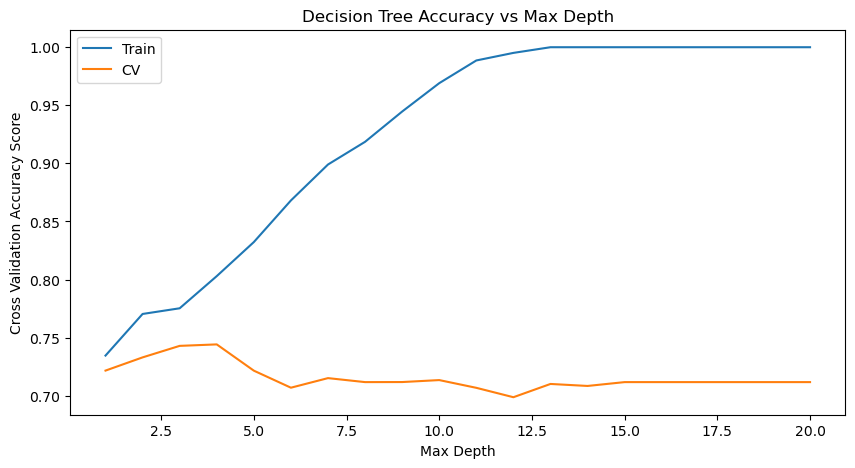

In [29]:
depths = np.arange(1, 21)
dt_train_scores = []
dt_cv_scores = []

for depth in depths:
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_model.fit(X_train_rf, y_train_rf)
    dt_train_pred = dt_model.predict(X_train_rf)
    dt_train_scores.append(accuracy_score(y_train_rf, dt_train_pred))
    dt_cv_scores.append(np.mean(cross_val_score(dt_model, X_train_rf, y_train_rf, cv=10)))
    
plt.figure(figsize=(10,5))
plt.plot(depths, dt_train_scores, label='Train')
plt.plot(depths, dt_cv_scores, label='CV')
plt.xlabel('Max Depth')
plt.ylabel('Cross Validation Accuracy Score')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.legend()

Run anXGBoost model

In [30]:
#do an xgboost model
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

# Define the features and target variable
y_xgb = df['Outcome']
X_xgb = df.drop(columns=['Outcome'], errors='ignore')
# Split the data into training and testing sets
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)
# Create a preprocessor for scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_xgb.columns)
    ],
    remainder='passthrough'
)
# Create a pipeline with preprocessing and the XGBoost model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])
# Fit the model
pipeline.fit(X_train_xgb, y_train_xgb)
# Make predictions
y_pred_xgb = pipeline.predict(X_test_xgb)
# Calculate accuracy
accuracy_xgb = accuracy_score(y_test_xgb, y_pred_xgb)
print(f'XGBoost Classifier Accuracy: {accuracy_xgb:.2f}')
# Display the confusion matrix
confusion_xgb = confusion_matrix(y_test_xgb, y_pred_xgb)
print('Confusion Matrix:\n', confusion_xgb)

XGBoost Classifier Accuracy: 0.71
Confusion Matrix:
 [[73 26]
 [18 37]]


/Users/dmnkallen/miniconda3/envs/ml2025/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:05:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
